<a href="https://colab.research.google.com/github/EduardoAcostaC/Simulacion-I/blob/main/Actividad_10_Simulaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problema Actividad 10**

Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma
probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30] (minutos).
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea
como máximo 10 minutos.

Probabilidad estimada de que la espera sea ≤ 10 minutos: 0.5522


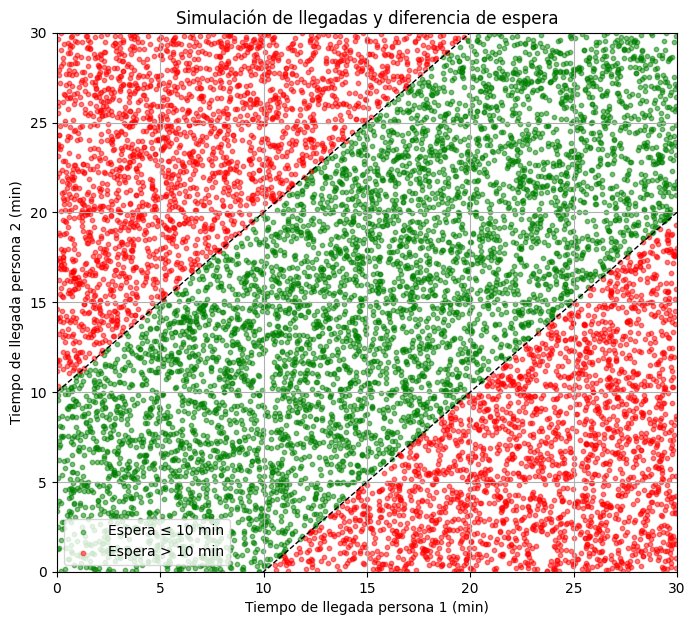

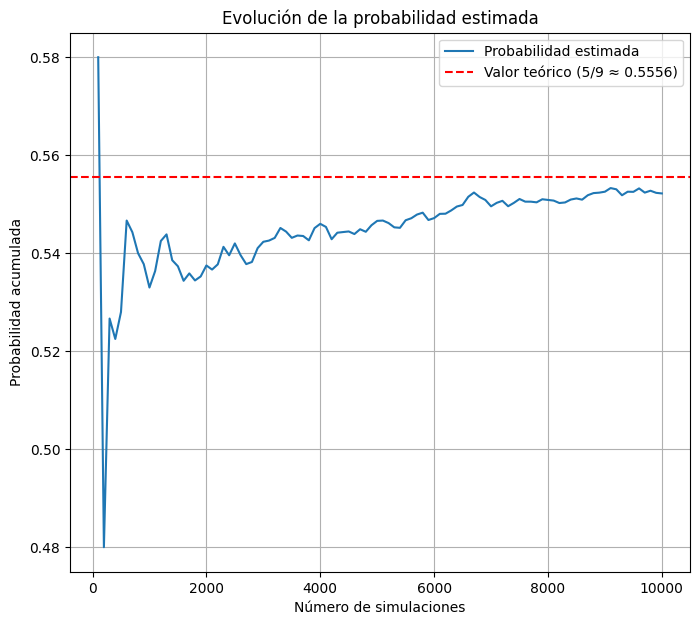

In [21]:
import matplotlib.pyplot as plt
import random

def generar_llegadas():
    #Generación de tiempo de llegada de aleatoria de las dos personas
    x = random.uniform(0, 30)
    y = random.uniform(0, 30)
    return x, y

def espera_valida(x, y, tiempo_max_espera=10):
    #Criterio de éxito |x-y|<=10
    return abs(x - y) <= tiempo_max_espera

def experimentos(n_simulaciones=10000):
    exitos = 0
    puntos_validos = []
    puntos_invalidos = []
    estimaciones = []
    iteraciones = []

    for i in range(1, n_simulaciones + 1):
        x, y = generar_llegadas()
        if espera_valida(x, y):
            exitos += 1
            puntos_validos.append((x, y))
        else:
            puntos_invalidos.append((x, y))

        if i % 100 == 0:
            estimaciones.append(exitos / i)
            iteraciones.append(i)

    probabilidad_estimada = exitos / n_simulaciones
    return probabilidad_estimada, puntos_validos, puntos_invalidos, iteraciones, estimaciones

#Simulaciones
N = 10000
resultado, puntos_validos, puntos_invalidos, iteraciones, estimaciones = experimentos(N)

print(f"Probabilidad estimada de que la espera sea ≤ 10 minutos: {resultado:.4f}")

# --- Gráfico de dispersión ---
x_validos, y_validos = zip(*puntos_validos)
x_invalidos, y_invalidos = zip(*puntos_invalidos)

plt.figure(figsize=(8, 7))

#Gráfico de dispersión
plt.scatter(x_validos, y_validos, color='green', alpha=0.5, label='Espera ≤ 10 min', s=10)
plt.scatter(x_invalidos, y_invalidos, color='red', alpha=0.5, label='Espera > 10 min', s=10)
plt.plot([0, 30], [10, 40], 'k--', linewidth=1)  # y = x + 10
plt.plot([0, 30], [-10, 20], 'k--', linewidth=1)  # y = x - 10
plt.title('Simulación de llegadas y diferencia de espera')
plt.xlabel('Tiempo de llegada persona 1 (min)')
plt.ylabel('Tiempo de llegada persona 2 (min)')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.grid(True)
plt.legend()

#Mostrar la primera figura
plt.show()

plt.figure(figsize=(8, 7))

#Gráfico de evolución de la probabilidad
plt.plot(iteraciones, estimaciones, label='Probabilidad estimada')
plt.axhline(y=5/9, color='red', linestyle='--', label='Valor teórico (5/9 ≈ 0.5556)')
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad acumulada')
plt.title('Evolución de la probabilidad estimada')
plt.legend()
plt.grid(True)

#Mostrar la segunda figura
plt.show()